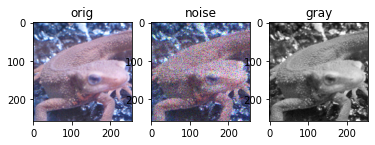

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage import io

img_orig = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256.png')
img_noise = io.imread('https://yoyoyo-yo.github.io/Gasyori100knock/dataset/images/imori_256x256_noise.png')
img_gray = cv2.cvtColor(img_orig, cv2.COLOR_RGB2GRAY)

plt.subplot(1, 3, 1); plt.imshow(img_orig); plt.title('orig')
plt.subplot(1, 3, 2); plt.imshow(img_noise); plt.title('noise')
plt.subplot(1, 3, 3); plt.imshow(img_gray, cmap='gray'); plt.title('gray')
plt.show()

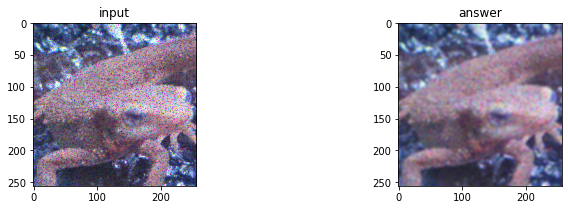

In [2]:
# Q11
img_smoth = cv2.blur(img_noise, (5,5))

plt.figure(figsize=(12,3))
plt.subplot(1,2,1); plt.title('input'); plt.imshow(img_noise)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_smoth)
plt.show()

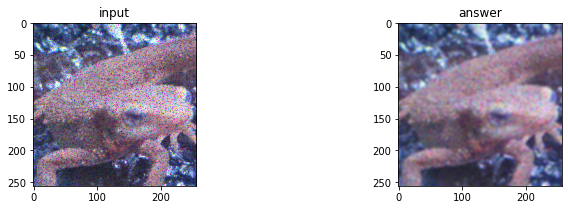

In [4]:
k = np.full((5,5),1/25)
img_smoth2 = cv2.filter2D(img_noise, -1, k)

plt.figure(figsize=(12,3))
plt.subplot(1,2,1); plt.title('input'); plt.imshow(img_noise)
plt.subplot(1, 2, 2); plt.title('answer'); plt.imshow(img_smoth2)
plt.show()

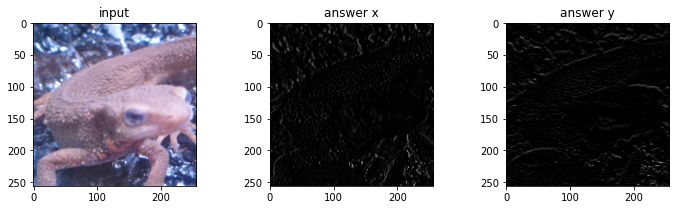

In [12]:
# Q14
kx = np.array([[0,0,0],[-1,1,0],[0,0,0]])
ky = np.array([[0,-1,0],[0,1,0],[0,0,0]])
ax = cv2.filter2D(img_gray, -1, kx)
ay = cv2.filter2D(img_gray, -1, ky)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(1, 3, 2); plt.title('answer x'); plt.imshow(ax, cmap='gray')
plt.subplot(1, 3, 3); plt.title('answer y'); plt.imshow(ay, cmap='gray')
plt.show()

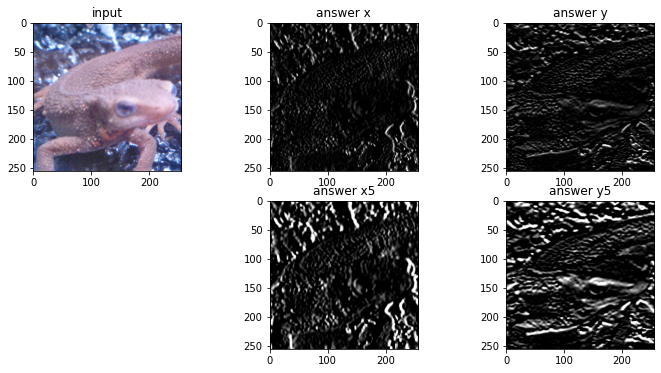

In [18]:
# Q15
def prewitt(size = (3,3), mode='x'):
    k = np.zeros(size)
    if mode=='x':
        k[:, 0] = 1
        k[:, -1] = -1
    else:
        k[0, :] = 1
        k[-1, :] = -1
    return k

ax = cv2.filter2D(img_gray, -1, prewitt(mode='x'))
ay = cv2.filter2D(img_gray, -1, prewitt(mode='y'))
ax5 = cv2.filter2D(img_gray, -1, prewitt(size=(5,5),mode='x'))
ay5 = cv2.filter2D(img_gray, -1, prewitt(size=(5,5),mode='y'))

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(2, 3, 2); plt.title('answer x'); plt.imshow(ax, cmap='gray')
plt.subplot(2, 3, 3); plt.title('answer y'); plt.imshow(ay, cmap='gray')
plt.subplot(2, 3, 5); plt.title('answer x5'); plt.imshow(ax5, cmap='gray')
plt.subplot(2, 3, 6); plt.title('answer y5'); plt.imshow(ay5, cmap='gray')
plt.show()



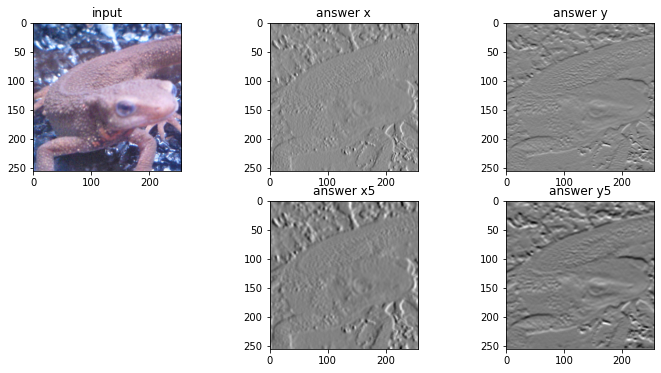

In [27]:
# Q16
def filter_sobel(size=(3,3), mode='x'):
    k = np.zeros(size)
    if mode=='x':
        k[:, 0] = 1
        k[:, -1] = -1
        k[(size[0]+1)//2, 0] = 2
        k[(size[0]+1)//2, -1] = -2
    else:
        k[0, :] = 1
        k[-1, :] = -1
        k[0, (size[1]+1)//2] = 2
        k[-1, (size[1]+1)//2] = -2
    return k

def norm(d):
    d -= ax.min()
    d /= ax.max()
    return d

ax = norm(cv2.filter2D(img_gray.astype(np.float32), -1, filter_sobel(mode='x')))
ay = norm(cv2.filter2D(img_gray.astype(np.float32), -1, filter_sobel(mode='y')))
ax5 = norm(cv2.filter2D(img_gray.astype(np.float32), -1, filter_sobel(size=(5,5),mode='x')))
ay5 = norm(cv2.filter2D(img_gray.astype(np.float32), -1, filter_sobel(size=(5,5),mode='y')))

plt.figure(figsize=(12, 6))
plt.subplot(2, 3, 1); plt.title('input'); plt.imshow(img_orig, cmap='gray')
plt.subplot(2, 3, 2); plt.title('answer x'); plt.imshow(ax, cmap='gray')
plt.subplot(2, 3, 3); plt.title('answer y'); plt.imshow(ay, cmap='gray')
plt.subplot(2, 3, 5); plt.title('answer x5'); plt.imshow(ax5, cmap='gray')
plt.subplot(2, 3, 6); plt.title('answer y5'); plt.imshow(ay5, cmap='gray')
plt.show()